In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pyhyrec as pyhy

%matplotlib inline

In [3]:
# create a default cosmo params and injection params object
cosmo = pyhy.HyRecCosmoParams()
inj  = pyhy.HyRecInjectionParams()

z, xe, Tm = pyhy.call_run_hyrec(cosmo(), inj())

In [7]:
# create a cosmo params and injection params object with Primordial Black Holes
inj_pbh  = pyhy.HyRecInjectionParams({'fpbh' : 1.0, 'Mpbh': 1e+3})
z_pbh, xe_pbh, Tm_pbh = pyhy.call_run_hyrec(cosmo(), inj_pbh())

In [10]:
# create a cosmo params and injection params object with Primordial Magnetic Fields
inj_pmf = pyhy.HyRecInjectionParams({'sigmaB_PMF' : 3, 'nB_PMF': -2.9})
z_pmf, xe_pmf, Tm_pmf = pyhy.call_run_hyrec(cosmo(), inj_pmf())

In [4]:
# load data for comparisons to the precomputed default case
data = np.loadtxt("./tests/output_xe.dat")

z_c = np.flip(data[:, 0])
xe_c = np.flip(data[:, 1])
Tm_c = np.flip(data[:, 2])

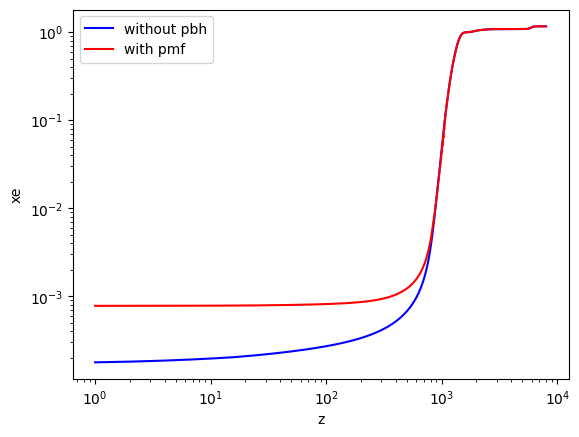

In [11]:
# plotting xe
fig = plt.figure()
ax = fig.gca()

ax.plot(z, xe, '-b', label='without pbh')
#ax.plot(z_pbh, xe_pbh, '-r', label='with pbh')
ax.plot(z_pmf, xe_pmf, '-r', label='with pmf')
#ax.plot(z_c, xe_c, 'c-.',  label='without pbh (default)')

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylabel('xe')
ax.set_xlabel('z')
ax.legend()

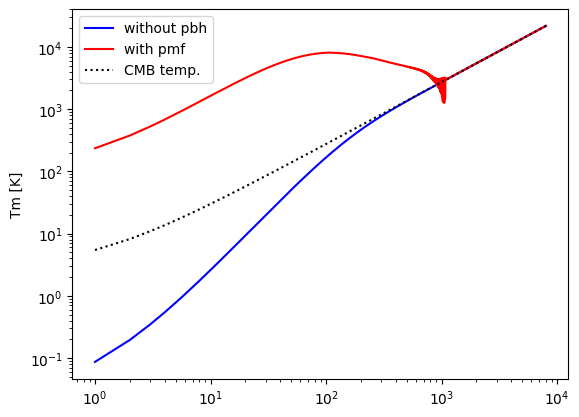

In [12]:
# plotting Tm
fig = plt.figure()
ax = fig.gca()

ax.plot(z, Tm, '-b', label='without pbh')
#ax.plot(z_pbh, Tm_pbh, '-r', label='with pbh')
ax.plot(z_pmf, Tm_pmf, '-r', label='with pmf')
#ax.plot(z_c, Tm_c, 'c-.',  label='without pbh (default)')

#ax.plot(z_pmf, (1.0-np.tanh((z_pmf - 1088)/50.0))/2.0)
ax.plot(z, cosmo.T0 * (1+z), color='k', linestyle=':', label='CMB temp.')

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylabel('Tm [K]')
#ax.set_xlabel('z')
ax.legend()